In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pingouin as pg
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Primeros pasos

## 1.1 Distribuciones y Paquetes 

### a) PyPI-El índice del paquete python 

In [ ]:
# pip install <package>
# pip install <package> -U
# pip list
# pip show <package>

## 1.2 Instalación de Python

### a) Windows

### b) Linux 

### c) Mac OS X 

## 1.3 Instalación de R y rpy2

### 1.3.1 Usando extensiones R dentro de los programas de Python

La R es una herramienta muy poderosa para el análisis de datos estadísticos. 

Ofrece muchos modelos estadísticos avanzados que (todavía) no están disponibles en Python. 

Para hacer que estos módulos sean accesibles desde Python, *rpy2* es una forma conveniente de ejecutar código R dentro de un entorno de Python. 

No es sorprendente que esto también requiera que R se haya instalado en el sistema actual. 

Personalmente, no soy un gran admirador de R. 

Es muy poderoso, pero en comparación con Python, el lenguaje me parece poco natural y torpe. 

Al igual que Python, R es gratuito y se puede obtener en https://cran.r-project.org/. 

In [40]:
#import os
#import rpy2
#import rpy2.situation

In [ ]:
#os.environ["R_HOME"] = rpy2.situation.r_home_from_registry()
#os.environ["R_USER"] = os.environ['USERPROFILE']

In [ ]:
#from rpy2.robjects.packages import importr

In [ ]:
# import R's "base" package
#base = importr('base')

In [ ]:
#from rpy2.robjects import r

In [ ]:
#%load_ext rpy2.ipython
#%precision 3

#### 1.3.2 Un ejemplo simple: diagrama de dispersión

Un caso de uso típico que uno imagina es tener algunas matrices numpy, queriendo calcular algunas estadísticas de interés en estas matrices y devolver el resultado a python. 

Supongamos que solo queremos ajustar un modelo lineal simple a un diagrama de dispersión.

In [ ]:
# Genero los datos con python

#X = np.array([0,1,2,3,4])
#Y = np.array([3,5,4,6,7])

In [ ]:
# Grafico con python

#plt.scatter(X, Y);

#### 1.3.3 Empujar variables de Python en R y ejecutar comandos R en IPython

Podemos lograr esto empujando primero las variables a R, ajustando un modelo y devolviendo los resultados. La línea mágica %Rpush copia sus argumentos en variables del mismo nombre en rpy2. 

La línea mágica %R evalúa la cadena en rpy2 y devuelve los resultados. En este caso, los coeficientes de un modelo lineal.

In [ ]:
#%Rpush X Y
#%R lm(Y~X)$coef

In [ ]:
# Note: %Rpush is equivalent to calling %R with just -i and no trailing code.
#A = np.arange(20)
#%R -i A
#%R mean(A)

In [ ]:
# We can check that the computation in R is correct fairly easily:

#Xr = X - X.mean()
#Yr = Y - Y.mean()
#slope = (Xr*Yr).sum() / (Xr**2).sum()
#intercept = Y.mean() - X.mean() * slope
#(intercept, slope)

In [ ]:
# It is also possible to return more than one value with %R.
#%R resid(lm(Y~X)); coef(lm(X~Y))

#### 1.3.4 Captura de salida literal de R en IPython

In [ ]:
# Unfortunately, the literal output from R does not work directly (yet):
#%R summary(lm(Y~X))

Por lo tanto tenemos que usar un truco: 
- Primero "capturamos" la salida del comando R 
- Y luego lo mostramos, línea por línea 

Nota: "%%R" ejecuta varias líneas de comando R

In [ ]:
#%%R
#X = c(1,2,3,4,5)
#Y = c(1,2,3,6,5)
#s = capture.output(summary(lm(Y~X)))

In [ ]:
# to get the variable back in to Python, we use 
# r from rpy2.robjects

#spy = r['s']

In [ ]:
#for line in spy[2:-1]:
#    print(line)

#### 1.3.5 Recuperar las variables R en IPython

Hay dos líneas mágicas, %Rpull y %Rget. Ambos son útiles después de que se haya ejecutado algún código R y haya variables en el espacio de nombres rpy2 que le gustaría recuperar. La principal diferencia es que uno devuelve el valor (%Rget), mientras que el otro lo extrae a self.shell.user_ns (%Rpull). 

Imagina que hemos almacenado los resultados de algún cálculo en la variable "a" en el espacio de nombres de rpy2. Usando la magia %R, podemos obtener estos resultados y almacenarlos en b. También podemos llevarlos directamente a user_ns con %Rpull. Ambos son puntos de vista sobre los mismos datos.

In [ ]:
#b = %R a=resid(lm(Y~X))
#two equivalent ways of getting things into Python
#%R -o a
#%Rpull a

# and to use it in Python
#c = r['a']

In [ ]:
#print(f'a = {a}')
#print(f'b = {b}')
#print(f'c = {c}')

In [ ]:
#%R d=resid(lm(Y~X)); e=coef(lm(Y~X))
#%R -o d -o e
#%Rpull e
#print(d)
#print(e)

#print(r['e'])

In [ ]:
# The magic %Rget retrieves one variable from R.
#%Rget A

#### 1.3.6 Trazado y captura de resultados

La consola de R (es decir, su conexión stdout()) es capturada por ipython, al igual que los gráficos que se publican como archivos PNG como el cuaderno con argumentos --pylab en línea. Como una llamada a %R puede producir un valor de retorno (ver arriba), debemos preguntarnos qué sucede con una magia como la que se muestra a continuación. El código R especifica que algo se publica en el cuaderno. Si se publica algo en el cuaderno, esa llamada a %R devuelve Ninguno.

In [ ]:
#v1 = %R plot(X,Y); print(summary(lm(Y~X))); vv=mean(X)*mean(Y)
#print('v1 is:', v1)
#v2 = %R mean(X)*mean(Y)
#print('v2 is:', v2)

#### 1.3.7 ¿Qué valor devuelve %R?

Algunas llamadas no tienen un valor de retorno particularmente interesante, el %R mágico no devolverá nada en este caso. El valor devuelto en rpy2 en realidad es NULL, por lo que %R devuelve Ninguno. 

Además, si el valor de retorno de una llamada a %R (en modo de línea) acaba de imprimirse en la consola, tampoco se devuelve su valor.

In [ ]:
#v = %R plot(X)
#assert (v is None)

Pero, si el último valor no imprimió nada en la consola, se devuelve el valor:

In [ ]:
#v = %R print(summary(X)); X
#print('v:', v)

El valor devuelto se puede suprimir con un ';' al final. o un argumento -n.

In [ ]:
#%R -n X

In [ ]:
#%R X; 

#### 1.3.8 Magia a nivel celular

A menudo, querremos hacer más que un simple modelo de regresión lineal. Puede haber varias líneas de código R que queramos usar antes de volver a python. Esta es la magia a nivel celular. 

Para la magia de nivel de celda, las entradas se pueden pasar a través del argumento -i o --inputs en la línea. Estas variables se copian del espacio de nombres del shell al espacio de nombres de R mediante rpy2.robjects.r.assign. Sería bueno no tener que copiarlos en R: rnumpy ( https://rpy2.github.io/doc/latest/html/introduction.html ) ha trabajado para limitar o al menos hacer transparente el número de copias. de una matriz. Esto parece algo natural para tratar de construir. Las matrices se pueden generar desde R mediante el argumento -o o --outputs en la línea. Todos los demás argumentos se envían a la función png de R, que es el dispositivo gráfico utilizado para crear los gráficos. 

Podemos rehacer los cálculos anteriores en una celda de ipython. También es posible que deseemos agregar algún resultado, como un resumen de R o quizás el diagnóstico de trazado estándar de la película.

In [ ]:
#%%R -i X,Y -o XYcoef
#XYlm = lm(Y~X)
#XYcoef = coef(XYlm)
#print(summary(XYlm))
#par(mfrow=c(2,2))
#plot(XYlm)

#### 1.3.9 Pasar datos de un lado a otro

Actualmente, los datos se pasan a través de RMagics.pyconverter cuando se pasa de python a R y RMagics.Rconverter cuando se pasa de R a python. 

La sintaxis parece estar todavía en desarrollo. Pero con los ejemplos aquí, espero que encuentre su camino.

In [ ]:
#seq1 = np.arange(10)

In [ ]:
#%%R -i seq1 -o seq2
#seq2 = rep(seq1, 2)

In [ ]:
#print(r['seq2'])
#print(type(seq2))

In [ ]:
# To use the rpy2 object with numpy, you have to convert it to an array:
#py_seq2 = np.array(r['seq2'])
#py_seq2[::2] = 0
#print(py_seq2)

La salida de R parece no funcionar para %%R en este momento:

In [ ]:
#%%R
#print(seq2)

Una vez que los datos de la matriz se han pasado a R, modificar su contenido no modifica la copia de R de los datos.

In [ ]:
#seq1[0] = 200
#%R print(seq1)

Pero, si pasamos datos como entrada y salida, el valor de "datos" en user_ns se sobrescribirá y la nueva matriz será una vista de los datos en la copia de R.

In [ ]:
#print(seq1)
#%R -i seq1 -o seq1
#print(seq1)
#seq1[0] = 200
#%R print(seq1)
#seq1_view = %R seq1
#print(seq1_view)

#### 1.3.10 R Gráficos

In [ ]:
#%R plot(X,Y)

#### 1.3.11 Manejo de excepciones (¡actualmente no es compatible/funciona!)

Las excepciones se manejan (se supone que se deben) devolviendo la excepción de rpy2 y la línea que la activó. 

Actualmente hay un problema con ese mecanismo: https://github.com/rpy2/rpy2/issues/792

In [ ]:
# try:
#    %R -n nosuchvar
#except Exception as e:
#    print(e.message)
#    pass

## 1.4 Recursos de Python

## 1.5 Un simple programa de Python 

### a) Hola Mundo 

In [2]:
print('Hola Mundo')

Hola Mundo


### b)  Cuadrado

Mostrar el cuadrado de los números del 0 al 5.

In [3]:
def cuadrado(x):
    
    return x**2

In [4]:
for i in range(6):
    
    print(i, cuadrado(i))

0 0
1 1
2 4
3 9
4 16
5 25


## Apéndice

### 1. Empezando 

Este cuaderno Jupyter es una breve demostración de Python para el análisis de datos científicos. 

Cubre los siguientes puntos: 

- Trazar una onda sinusoidal 
- Generar de una matriz de columnas de datos 
- Escribir datos en un archivo de texto y leer datos de un archivo de texto 
- Esperar la pulsación de un botón para continuar con la ejecución del programa 
- Usar un diccionario, que es similar a las estructuras de MATLAB 
- Extraer datos que cumplen una determinada condición 
- Cálcular la mejor línea de ajuste a datos ruidosos 
- Formato de salida de texto 
- Esperar una pulsación de teclado 
- Cálcular intervalos de confianza para ajustes de recta 
- Ahorrar cifras

#### 1.1 Módulos y Paquetes

En Python tienes que cargar explícitamente los módulos que necesitas. 

No se preocupe aquí por no conocer los módulos correctos: *numpy*, *scipy* y *matplotlib.pyplot* son casi todo lo que necesitará la mayor parte del tiempo, y se acostumbrará rápidamente a ellos.

import numpy as np                  # para trabajar con vectores y matrices
import matplotlib.pyplot as plt     # para graficar

#### 1.2 Onda sinusoidal

In [2]:
# Creo la onda sinusoidal

t = np.arange(0,10,0.1)
x = np.sin(t)

In [3]:
# Guardo los datos en un archivo de texto, en forma de columna.

out_file = 'test.txt'
np.savetxt(out_file, np.column_stack([t,x]) )

In [4]:
print(f'Los datos se han guardado en {out_file}.')

Los datos se han guardado en test.txt.


In [6]:
# Leo los datos en una variable diferente

inData = np.loadtxt(out_file)

t2 = inData[:,0] 
x2 = inData[:,1]

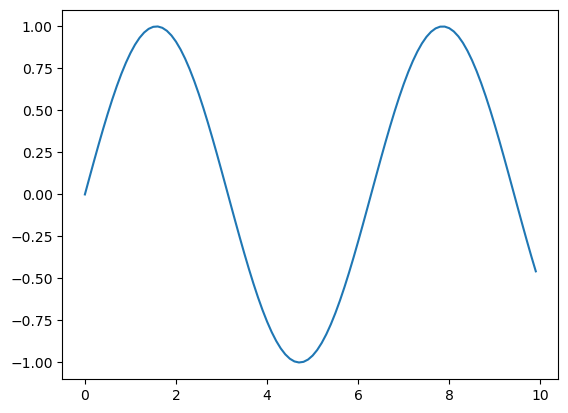

In [8]:
plt.plot(t2, x2);

#### 1.3 Rotando un Vector

Cuando trabaje con vectores y matrices, tenga en cuenta lo siguiente 
- Por defecto, los datos son vectores. 
- Usa *array* cuando quieras generar matrices.

#### 1.4 Datos ruidosos y ajustes de la recta 

Ajusta la siguiente función: 

$y = k*x + d$

In [14]:
# Generar la recta ruidosa

t = np.arange(-100, 100)

t[:10] # Muestro los primeros 10

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91])

In [10]:
par = {'offset':100, 'slope':0.5, 'noiseAmp':4}

In [13]:
x = par['offset'] + par['slope']*t + par['noiseAmp']*np.random.randn(len(t))

x[:10] # Muestro los primeros 10

array([51.24917615, 51.50067132, 56.92112539, 56.84708191, 51.91112262,
       52.82072346, 45.06254437, 57.59808658, 49.38142085, 48.79037898])

In [15]:
# Indexación booleana

x_high = x[t>10]
t_high = t[t>10]

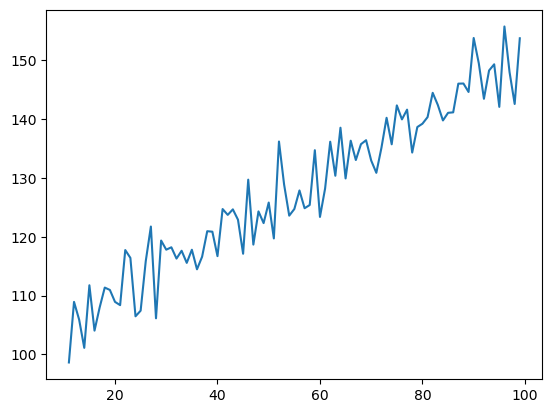

In [16]:
plt.plot(t_high, x_high);

In [18]:
x = np.arange(10)

In [19]:
# Indexación booleana combinada

top_range = x>2
bottom_range = x<8

In [20]:
x[top_range & bottom_range]

array([3, 4, 5, 6, 7])

#### 1.5 Ajustando una línea a los datos

In [24]:
# Determino la línea de mejor ajuste

# Genere una matriz de diseño, con "tiempo" en la primera columna y una columna de "1" en la segunda columna:

x_mat = np.column_stack([t_high, np.ones(len(t_high))])

x_mat[:10] # Muestro los primeros 10

array([[11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.]])

In [25]:
# Para la solución de MCO de una ecuación matricial lineal, 
# el parámetro opcional "rcond" determina cómo se manejan los valores singulares pequeños de la matriz.

slope, intercept = np.linalg.lstsq(x_mat, x_high, rcond=None)[0]

In [27]:
print(f'Intercepto: {intercept:5.3f}\nPendiente: {slope:5.3f}')

Intercepto: 99.652
Pendiente: 0.512


In [28]:
reg = intercept + slope * t_high

reg[:10]

array([105.27912587, 105.79070176, 106.30227765, 106.81385354,
       107.32542943, 107.83700533, 108.34858122, 108.86015711,
       109.371733  , 109.88330889])

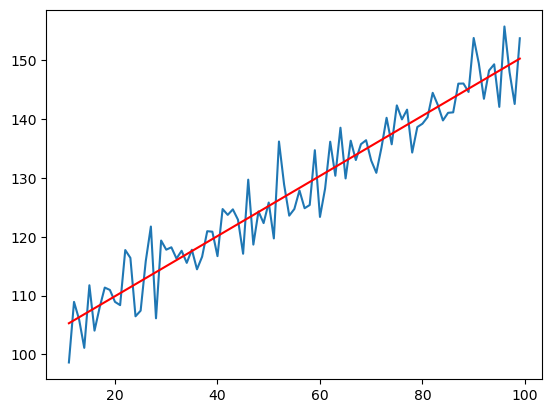

In [29]:
plt.plot(t_high, x_high)

plt.plot(t_high, reg, 'r')

plt.show()

#### 1.6 Pandas

In [32]:
data = {'x': t_high, 'y' :x_high}

In [33]:
df = pd.DataFrame(data)

df.head()

,x,y
0,11,98.606625
1,12,108.918377
2,13,105.893534
3,14,101.095103
4,15,111.741727


In [34]:
model = smf.ols('y ~ x', df).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.918   
Dependent Variable: y                AIC:                498.9521
Date:               2023-08-11 10:00 BIC:                503.9293
No. Observations:   89               Log-Likelihood:     -247.48 
Df Model:           1                F-statistic:        986.6   
Df Residuals:       87               Prob (F-statistic): 3.00e-49
R-squared:          0.919            Scale:              15.582  
------------------------------------------------------------------
             Coef.   Std.Err.     t      P>|t|    [0.025   0.975] 
------------------------------------------------------------------
Intercept   99.6518    0.9887  100.7913  0.0000  97.6867  101.6169
x            0.5116    0.0163   31.4099  0.0000   0.4792    0.5439
-----------------------------------------------------------------
Omnibus:              1.248        Durbin-Watson:           2.473
Prob(Omnibus):        

#### 1.7 Pingouin

In [36]:
pg.linear_regression(df.x, df.y).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,99.652,0.989,100.791,0.0,0.919,0.918,97.687,101.617
1,x,0.512,0.016,31.410,0.0,0.919,0.918,0.479,0.544


#### 1.8 Información en la Web

* [Scipy Lecture Notes](https://scipy-lectures.org/) **If you read nothing else, read this!**
* [numpy-for-matlab-users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) Start here if you have lots of Matlab experience.
* [The Python Tutorial](https://docs.python.org/3.11/tutorial/)  The original introduction.
* [jrjohansson's scientific-python-lectures](https://github.com/jrjohansson/scientific-python-lectures) Lectures on scientic computing with Python. Good ipython notebooks, but not very actively maintained
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html) Especially for the visualization of statistical data, seaborn is extremely valuable

# 2. Elementos de la programación científica en Python

## 2.1 Tipos de datos de Python

### a) Lista

In [5]:
lista1 = ['abc', 'def', 'ghij']

lista1

['abc', 'def', 'ghij']

In [6]:
lista1.append('klm')

In [7]:
lista1

['abc', 'def', 'ghij', 'klm']

In [8]:
lista2 = [1,2,3]

lista3 = [4,5,6]

In [9]:
lista2 + lista3

[1, 2, 3, 4, 5, 6]

### b) Array

In [12]:
array1 = np.array(lista2)

array1

array([1, 2, 3])

In [13]:
array2 = np.array(lista3)

array2

array([4, 5, 6])

In [14]:
array1 + array2

array([5, 7, 9])

In [15]:
array1.dot(array2) # Multiplicación

32

In [16]:
array1 @ array2

32

### c) Tupla 

In [17]:
tupla = ('abc', np.arange(0,3,0.2), 2.5)

tupla

('abc',
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8]),
 2.5)

In [18]:
tupla[2]

2.5

### d) Diccionarios

In [19]:
diccionario1 = dict(one = 1, two = 2, info = 'alguna información')

diccionario1

{'one': 1, 'two': 2, 'info': 'alguna información'}

In [20]:
diccionario2 = {'diez': 1, 'veinte': 20, 'info': 'más información'}

diccionario2

{'diez': 1, 'veinte': 20, 'info': 'más información'}

In [21]:
diccionario1['info']

'alguna información'

In [22]:
diccionario1.keys()

dict_keys(['one', 'two', 'info'])

In [23]:
diccionario1.values()

dict_values([1, 2, 'alguna información'])

### e) DataFrame

## 2.2 Indexación y corte

In [24]:
lista1

['abc', 'def', 'ghij', 'klm']

In [25]:
lista1[1:3] # Elementos comienzan hasta el final-1

['def', 'ghij']

In [26]:
lista1[2:] # Elementos comienzan a través del resto de la array

['ghij', 'klm']

In [27]:
lista1[:2] # Elementos desde el principio hasta el final-1

['abc', 'def']

In [28]:
lista1[:] # Una copia de toda la matriz

['abc', 'def', 'ghij', 'klm']

In [29]:
lista1[1:4:2] # De principio a fin, paso a paso

['def', 'klm']

In [30]:
lista1[-1] # Último elemento de la matriz

'klm'

In [31]:
lista1[-2:] # Los dos últimos elementos de la matriz

['ghij', 'klm']

In [32]:
lista1[:-2] # Todo excepto los dos últimos elementos

['abc', 'def']

In [33]:
lista1[:5]

['abc', 'def', 'ghij', 'klm']

## 2.3 Vectores Numpy y arrays 

### a) np.zeros

In [34]:
np.zeros(3) # Por defecto, las funciones numpy generan vectores 1D

array([0., 0., 0.])

In [35]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

### b) np.ones 

In [36]:
np.ones(3)

array([1., 1., 1.])

In [37]:
np.ones([2,3])

array([[1., 1., 1.],
       [1., 1., 1.]])

### c) np.random.randn

In [38]:
np.random.randn() # Genera números distribuidos normalmente, con una media de 0 y una desviación estándar de 1.

0.3924583534177893

In [39]:
np.random.randn(2, 3) 

array([[ 0.48465024,  0.75412829, -0.86572675],
       [ 1.30203578,  1.92986362, -0.61590086]])

### d) np.arange 

In [40]:
np.arange(3)

array([0, 1, 2])

In [41]:
xBajo = np.arange(0, 3, 0.5)

xBajo

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [42]:
xAlto = np.arange(3, 5, 0.5)

xAlto

array([3. , 3.5, 4. , 4.5])

### e) np.linspace

In [43]:
np.linspace(0, 10, 6)

array([ 0.,  2.,  4.,  6.,  8., 10.])

### f) np.array

In [2]:
np.array([[1,2],
          [3,4]])

array([[1, 2],
       [3, 4]])

### g) Matrices

In [3]:
A = np.array([[1, 2],
              [3, 4] ])

A

array([[1, 2],
       [3, 4]])

In [4]:
A[0]

array([1, 2])

#### Advertencia

In [5]:
x = np.arange(3)

x

array([0, 1, 2])

In [6]:
A

array([[1, 2],
       [3, 4]])

In [7]:
x.T

array([0, 1, 2])

In [8]:
# El resultado indica que un vector sigue siendo un vector,
# y que la transposición con '.T' no tiene efecto en su forma. 

x.T == x 

array([ True,  True,  True])

In [9]:
A.T

array([[1, 3],
       [2, 4]])

In [10]:
A.T == A

array([[ True, False],
       [False,  True]])

### h) np.r_

In [11]:
# Filas

np.r_[1,2,3]

array([1, 2, 3], dtype=int32)

### i) np.c_

In [12]:
# Columnas

np.c_[
    [1.5,2,3]
] 

array([[1.5],
       [2. ],
       [3. ]])

### j) np.atleast_2d

In [13]:
x = np.arange(5)

x

array([0, 1, 2, 3, 4])

In [14]:
x.T

array([0, 1, 2, 3, 4])

In [15]:
x_2d = np.atleast_2d(x)

x_2d

array([[0, 1, 2, 3, 4]])

In [16]:
x_2d.T

array([[0],
       [1],
       [2],
       [3],
       [4]])

### k) np.column_stack

In [17]:
x = np.arange(3)

x

array([0, 1, 2])

In [18]:
y = np.arange(3,6)

y

array([3, 4, 5])

In [19]:
np.column_stack((x,y))

array([[0, 3],
       [1, 4],
       [2, 5]])

### Apéndice

Este cuaderno contiene consejos y trucos para trabajar con vectores y matrices: 
- Cómo generar matrices de números 
- Cómo generar matrices, vectores de filas y columnas 
- Cómo volver a rotar vectores 
- Y una primera introducción al concepto a menudo muy valioso de "radiodifusión"

#### 1. Generación de datos

##### 1.1 Generación de vectores uniformemente espaciados

In [41]:
x = np.arange(1, 5, 0.5)

x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [42]:
y = np.linspace(0, 1, 11)

y

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

##### 1.2 Generación de matrices

In [44]:
# A diferencia de MATLAB, Python por defecto genera vectores, ¡NO matrices!

zero_vector = np.zeros(3)

zero_vector

array([0., 0., 0.])

In [45]:
# "np.zeros" y "np.ones" generan ceros y unos, respectivamente.
# Solo toman UN argumento de entrada, que puede ser un número o una tupla:

zero_matrix = np.zeros((3,3))

zero_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [46]:
# Nota: "np.random.randn", por el contrario, puede usar más de un argumento de entrada:

np.random.randn(3,2)

array([[ 3.24081238, -0.27443881],
       [-0.10845576, -0.29893401],
       [ 0.35785241,  0.93585238]])

In [47]:
# Aquí un ejemplo de cómo generar convenientemente una matriz de vectores columna:

phi = np.deg2rad(np.arange(0,360,30))
sines = np.sin(phi)
cosines = np.cos(phi)

data_mat = np.column_stack((sines, cosines))

print(np.round(data_mat, 2))

[[ 0.    1.  ]
 [ 0.5   0.87]
 [ 0.87  0.5 ]
 [ 1.    0.  ]
 [ 0.87 -0.5 ]
 [ 0.5  -0.87]
 [ 0.   -1.  ]
 [-0.5  -0.87]
 [-0.87 -0.5 ]
 [-1.   -0.  ]
 [-0.87  0.5 ]
 [-0.5   0.87]]


#####  1.3 Generar vectores de fila y columna

In [48]:
row_vector = np.array([1, 2, 3])

row_vector

array([1, 2, 3])

In [49]:
row_vector2 = np.r_[3,4,5]

row_vector2

array([3, 4, 5], dtype=int32)

In [50]:
col_vector = np.c_[[4,5,6]]

col_vector

array([[4],
       [5],
       [6]])

In [51]:
# Este usa el comando "np.newaxis" para generar un vector de columna ....

row_vector[..., np.newaxis]

array([[1],
       [2],
       [3]])

In [52]:
# Usamos "reshape": el "-1" significa "cuantos haya"

np.reshape(row_vector, (-1,1))

array([[1],
       [2],
       [3]])

In [53]:
row_vector

array([1, 2, 3])

In [54]:
# Los vectores no se pueden transponer

row_vector.T

array([1, 2, 3])

In [55]:
# Si quieres transponer un vector, tiene que ser bidimensional

vector_2d = np.atleast_2d(row_vector)

vector_2d.T

array([[1],
       [2],
       [3]])

#### 2. Trabajando con Vectores y Matrices

##### 2.1 Rotación de un vector

In [56]:
# Matriz de rotación para una rotación de 30 grados

alpha = np.deg2rad(30)

rot_mat = np.array([[np.cos(alpha), -np.sin(alpha)],
                    [np.sin(alpha), np.cos(alpha)]])

In [57]:
# La forma más elegante de especificar una multiplicación de matrices es con "@"

vec = np.r_[1,0]

vec_rotated = rot_mat @ vec

In [60]:
print(rot_mat)
print(f'\nRoté {str(vec)} en {str(vec_rotated)}')

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]

Roté [1 0] en [0.8660254 0.5      ]


##### 2.2 Rotación de una lista de vectores

In [61]:
# Listas de vectores, p. una secuencia de posiciones 3D, normalmente se almacenan como una matriz en forma de columna

positions = np.random.randn(10, 2)

In [62]:
# Para rotarlos, debe tener cuidado de que las "posiciones" coincidan con la matriz de rotación:
# tienen que ser transpuestas
# Y para devolver los datos a la forma de columna, debe volver a transponerlos

rotated = (rot_mat @ positions.T).T

In [63]:
positions

array([[ 0.94818565,  0.03659107],
       [ 0.92589023,  0.6095005 ],
       [ 0.77841299,  0.01078163],
       [ 0.63893973,  0.54975127],
       [ 0.62832418,  1.06814018],
       [-0.11921495, -1.08259315],
       [ 1.01895365, -1.43913162],
       [ 0.06380964, -0.63517862],
       [ 0.69406374, -0.70698396],
       [ 0.68454396,  0.53657522]])

In [64]:
rotated

array([[ 0.80285732,  0.50578162],
       [ 0.49709421,  0.99078803],
       [ 0.66873461,  0.39854366],
       [ 0.27846241,  0.79556843],
       [ 0.01007461,  1.23919862],
       [ 0.43805341, -0.99716065],
       [ 1.60200556, -0.73684772],
       [ 0.37285008, -0.518176  ],
       [ 0.95456881, -0.2652342 ],
       [ 0.32454485,  0.80695975]])

##### 2.3 "Radiodifusión"

En *numpy*, "transmitir" es una forma conveniente de agregar números o vectores a una matriz, si las dimensiones coinciden.

Aquí, muestro cómo restar el valor medio de cada columna:

In [65]:
# Datos

data = np.arange(15).reshape((5,3))

data

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [66]:
# Media general

np.mean(data)

7.0

In [67]:
# Media sobre todas las filas

np.mean(data, axis=0)

array([6., 7., 8.])

In [68]:
# Ahora usamos "radiodifusión" para restar la media de cada columna:
# si el segundo índice coincide, la operación se aplica a cada fila:

data - np.mean(data, axis = 0)

array([[-6., -6., -6.],
       [-3., -3., -3.],
       [ 0.,  0.,  0.],
       [ 3.,  3.,  3.],
       [ 6.,  6.,  6.]])

**Nota:** 

Esto solo funciona en el último índice de "datos", ya que las reglas de transmisión requieren que este índice coincida con el primer índice de la siguiente matriz.

Si este no es el caso, se produce un error, como se muestra en la siguiente declaración:

In [69]:
# Esto solo funciona en el último índice de "datos";
# ya que las reglas de transmisión requieren que este índice coincida
# con la longitud del vector!
# ADVERTENCIA: ¡Entonces el siguiente comando conducirá a un error!

# En Python, los errores se pueden detectar con "try - except":
try:
    data - np.mean(data, axis=1)
except ValueError:
    print('ERROR: La forma de los operandos no coincide')

ERROR: La forma de los operandos no coincide


## 2.4 DataFrames pandas

### a) Sintaxis básica de DataFrames

In [21]:
df = pd.DataFrame({
    'Nombre':['Peter','Paul','Mary'],
    'Apellido':['Doe','Miller','Johnson'],
    'Peso':[68.3, 77.1, 56.7],
    'Genero':['m','m','f'],
    'Ranking':[2, 3, 1],
    'Dob':['1958-05-03','1958-12-01','1959-03-20']
})

df

,Nombre,Apellido,Peso,Genero,Ranking,Dob
0,Peter,Doe,68.3,m,2,1958-05-03
1,Paul,Miller,77.1,m,3,1958-12-01
2,Mary,Johnson,56.7,f,1,1959-03-20


In [22]:
df.dtypes

Nombre       object
Apellido     object
Peso        float64
Genero       object
Ranking       int64
Dob          object
dtype: object

In [25]:
df.Dob = pd.to_datetime(df.Dob)

In [27]:
df.dtypes

Nombre              object
Apellido            object
Peso               float64
Genero              object
Ranking              int64
Dob         datetime64[ns]
dtype: object

In [28]:
df

,Nombre,Apellido,Peso,Genero,Ranking,Dob
0,Peter,Doe,68.3,m,2,1958-05-03
1,Paul,Miller,77.1,m,3,1958-12-01
2,Mary,Johnson,56.7,f,1,1959-03-20


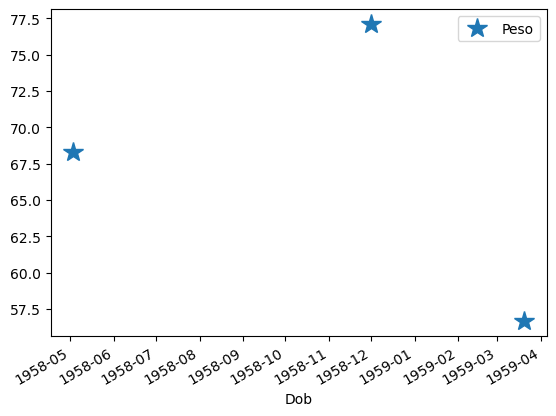

In [29]:
df.plot('Dob', 'Peso', marker = '*', lw=0 , ms = 15);

In [30]:
t = np.arange(0, 10, 0.1)

t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [31]:
x = np.sin(t)

x

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

In [32]:
y = np.cos(t)

y

array([ 1.        ,  0.99500417,  0.98006658,  0.95533649,  0.92106099,
        0.87758256,  0.82533561,  0.76484219,  0.69670671,  0.62160997,
        0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
        0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
       -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
       -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
       -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
       -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237,
        0.28366219,  0.37797774,  0.46851667,  0.55437434,  0.63469288,
        0.70866977,  0.77556588,  0.83471278,  0.88551952,  0.92747843,
        0.96017029,  0.98326844,  0.9965421 ,  0.99985864,  0.99318492,
        0.97658763,  0.95023259,  0.91438315,  0.86939749,  0.81

In [34]:
df = pd.DataFrame({'Tiempo': t, 'x': x, 'y': y})

df.head()

,Tiempo,x,y
0,0.0,0.000000,1.000000
1,0.1,0.099833,0.995004
2,0.2,0.198669,0.980067
3,0.3,0.295520,0.955336
4,0.4,0.389418,0.921061


In [35]:
df.Tiempo

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
     ... 
95    9.5
96    9.6
97    9.7
98    9.8
99    9.9
Name: Tiempo, Length: 100, dtype: float64

In [36]:
# Alternativamente

df['Tiempo']

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
     ... 
95    9.5
96    9.6
97    9.7
98    9.8
99    9.9
Name: Tiempo, Length: 100, dtype: float64

In [38]:
datos = df[['Tiempo', 'y']]

datos.head()

,Tiempo,y
0,0.0,1.000000
1,0.1,0.995004
2,0.2,0.980067
3,0.3,0.955336
4,0.4,0.921061


In [39]:
datos.tail()

,Tiempo,y
95,9.5,-0.997172
96,9.6,-0.984688
97,9.7,-0.962365
98,9.8,-0.930426
99,9.9,-0.889191


In [40]:
datos[4:10]

,Tiempo,y
4,0.4,0.921061
5,0.5,0.877583
6,0.6,0.825336
7,0.7,0.764842
8,0.8,0.696707
9,0.9,0.621610


In [41]:
df[['Tiempo', 'y']][4:10]

,Tiempo,y
4,0.4,0.921061
5,0.5,0.877583
6,0.6,0.825336
7,0.7,0.764842
8,0.8,0.696707
9,0.9,0.621610


In [42]:
df.iloc[4:10, [0,2]]

,Tiempo,y
4,0.4,0.921061
5,0.5,0.877583
6,0.6,0.825336
7,0.7,0.764842
8,0.8,0.696707
9,0.9,0.621610


In [43]:
datos.values

array([[ 0.        ,  1.        ],
       [ 0.1       ,  0.99500417],
       [ 0.2       ,  0.98006658],
       [ 0.3       ,  0.95533649],
       [ 0.4       ,  0.92106099],
       [ 0.5       ,  0.87758256],
       [ 0.6       ,  0.82533561],
       [ 0.7       ,  0.76484219],
       [ 0.8       ,  0.69670671],
       [ 0.9       ,  0.62160997],
       [ 1.        ,  0.54030231],
       [ 1.1       ,  0.45359612],
       [ 1.2       ,  0.36235775],
       [ 1.3       ,  0.26749883],
       [ 1.4       ,  0.16996714],
       [ 1.5       ,  0.0707372 ],
       [ 1.6       , -0.02919952],
       [ 1.7       , -0.12884449],
       [ 1.8       , -0.22720209],
       [ 1.9       , -0.32328957],
       [ 2.        , -0.41614684],
       [ 2.1       , -0.5048461 ],
       [ 2.2       , -0.58850112],
       [ 2.3       , -0.66627602],
       [ 2.4       , -0.73739372],
       [ 2.5       , -0.80114362],
       [ 2.6       , -0.85688875],
       [ 2.7       , -0.90407214],
       [ 2.8       ,

### b) Nota: Selección de datos

In [70]:
# Datos

data = pd.DataFrame({
    'Género': ['f', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm', 'm'],
    'TV': [3.4, 3.5, 2.6, 4.7, 4.1, 4.1, 5.1, 3.9, 3.7, 2.1, 4.3] })

In [72]:
# Agrupar los datos

grouped = data.groupby('Género')

grouped

In [74]:
grouped.describe()

TV                                               
       count      mean       std  min    25%  50%  75%  max
Género                                                     
f        5.0  4.080000  0.769415  3.4  3.500  3.7  4.7  5.1
m        6.0  3.516667  0.926103  2.1  2.925  4.0  4.1  4.3

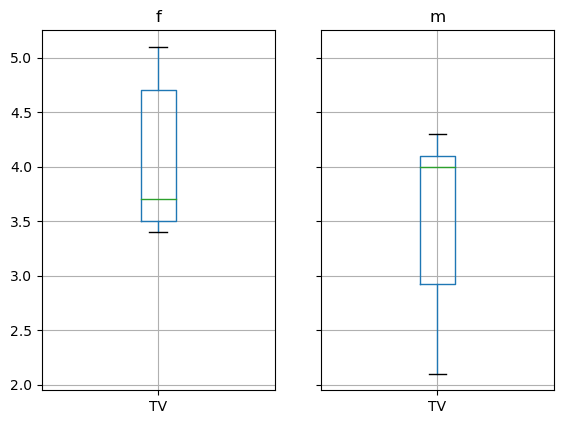

In [75]:
# Grafico

grouped.boxplot()

plt.show()

In [76]:
# Obtener los grupos como DataFrames

df_female = grouped.get_group('f')

df_female

,Género,TV
0,f,3.4
1,f,3.5
3,f,4.7
6,f,5.1
8,f,3.7


In [77]:
# Genera algunos datos de cadena

data = '''name, exam, trial, points
    Peter, midTerm, 1, 40
    Paul, midTerm, 1, 60
    Mary, midTerm, 1, 20
    Mary, midTerm, 2, 70
    Peter, final, 1, 60
    Paul, final, 1, 20
    Mary, final, 1, 80
    Paul, final, 2, 75
    '''

In [79]:
from io import StringIO

In [80]:
# Escribirlos en un búfer

buffer = StringIO()     # creando un búfer vacío

buffer.write(data)

224

In [81]:
# Léalo desde el búfer a un marco de datos de pandas

buffer.seek(0)

df = pd.read_csv(buffer, sep='[, ]+', engine='python')

df.head()

,name,exam,trial,points
0,Peter,midTerm,1,40
1,Paul,midTerm,1,60
2,Mary,midTerm,1,20
3,Mary,midTerm,2,70
4,Peter,final,1,60


In [83]:
# Generar una tabla dinámica

pd.pivot_table(df, index=['exam', 'name'], values=['points'], columns=['trial'])

points      
trial              1     2
exam    name              
final   Mary    80.0   NaN
        Paul    20.0  75.0
        Peter   60.0   NaN
midTerm Mary    20.0  70.0
        Paul    60.0   NaN
        Peter   40.0   NaN

In [84]:
out =  pd.pivot_table(df, index=['exam', 'name'], values=['points'], aggfunc=[np.max, len])
    
out

amax    len
              points points
exam    name               
final   Mary      80      1
        Paul      75      2
        Peter     60      1
midTerm Mary      70      2
        Paul      60      1
        Peter     40      1

In [85]:
# Generar datos que contengan "nan":

x = np.arange(7, dtype=float)    

y = x**2

In [86]:
x[3] = np.nan

y[ [2,5] ] = np.nan

In [87]:
df = pd.DataFrame({'x':x, 'y':y})

df

,x,y
0,0.0,0.0
1,1.0,1.0
2,2.0,NaN
3,NaN,9.0
4,4.0,16.0
5,5.0,NaN
6,6.0,36.0


In [ ]:
# Diferentes formas de manejar los "nan" en un DataFrame:

In [88]:
# Suelta todas las filas que contengan nan-s

df.dropna()

,x,y
0,0.0,0.0
1,1.0,1.0
4,4.0,16.0
6,6.0,36.0


In [89]:
# Reemplazar con el siguiente valor más bajo

df.fillna(method='pad')

,x,y
0,0.0,0.0
1,1.0,1.0
2,2.0,1.0
3,2.0,9.0
4,4.0,16.0
5,5.0,16.0
6,6.0,36.0


In [90]:
# Reemplazar con un valor interpolado

df.interpolate()

,x,y
0,0.0,0.0
1,1.0,1.0
2,2.0,5.0
3,3.0,9.0
4,4.0,16.0
5,5.0,26.0
6,6.0,36.0


## 2.5 Funciones, módulos y paquetes

### a) Funciones

### b) Módulos

In [44]:
from typing import Tuple

Demostración de una función de Python.

In [45]:
def income_and_expenses(data : np.ndarray) -> Tuple[float, float]:
    """ Encuentra la suma de los números positivos y la suma de los negativos.

    Parámeteros
    ----------
    data : numpy array (,n)
    Transacciones de cuenta entrantes y salientes       

    Retorna
    -------
    income : Suma de las transacciones entrantes
    expenses : Suma de las transacciones de la cuenta saliente
    """
    
    income = np.sum(data[data>0])
    expenses = np.sum(data[data<0])
    
    return (income, expenses)


if __name__=='__main__':
    testData = np.array([-5, 12, 3, -6, -4, 8])
        
    if testData[0] < 0:
        print('Su primera transacción fue una pérdida y se cancelará.')
        testData = np.delete(testData, 0)
    else:
        print('Felicitaciones: ¡Su primera transacción fue una ganancia!')
        
    (my_income, my_expenses) = income_and_expenses(testData)
    print(f'Usted ha ganado {my_income:5.2f} EUR, y ha gastado {-my_expenses:5.2f} EUR.')

Su primera transacción fue una pérdida y se cancelará.
Usted ha ganado 23.00 EUR, y ha gastado 10.00 EUR.


In [46]:
%run L2_2_python_module

Your first transaction was a loss, and will be dropped.
You have earned 23.00 EUR, and spent 10.00 EUR.


Demostración de importar un módulo de Python.

In [47]:
# Paquetes adicionales: esto importa la función definida anteriormente

import L2_2_python_module as py_func

In [48]:
# Generar datos de prueba

testData = np.arange(-5, 10)

testData

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [49]:
# Usar una función del módulo importado

out = py_func.income_and_expenses(testData)

out

(45, -15)

In [50]:
print(f'Usted ha ganado {out[0]:5.2f} EUR, y ha gastado {-out[1]:5.2f} EUR.')

Usted ha ganado 45.00 EUR, y ha gastado 15.00 EUR.


# 3. Programación Interactiva—IPython/Jupyter

## 3.1 Flujo de trabajo

## 3.2 Interfaces de Jupyter

### a) Consola Qt 

In [51]:
x = np.arange(0,10,0.1)

y = np.sin(x)

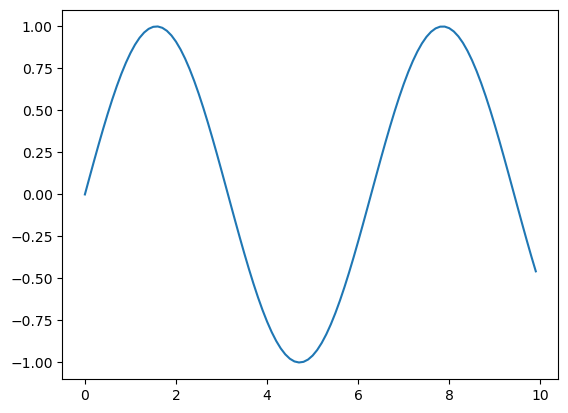

In [54]:
plt.plot(x,y);

In [55]:
np.arange? # Me brinda información

### b) Jupyter Notebook

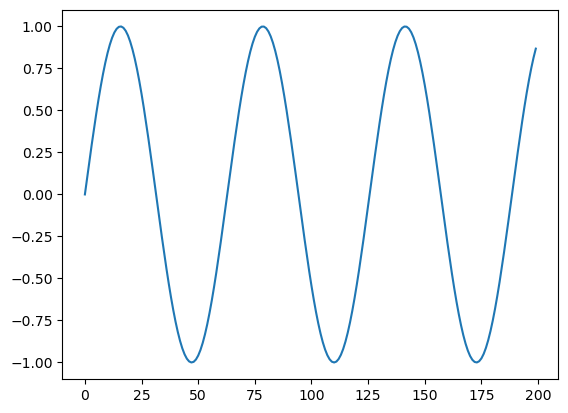

In [56]:
plt.plot(np.sin(np.arange(0,20,0.1)));

## 3.3 Personalización de IPython/Jupyter

## 3.4 Ejemplo de sesión interactiva

In [57]:
t = np.arange(0,10,0.1)

t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [58]:
freq = 0.5

In [59]:
omega = 2 * np.pi * freq # Será igual a pi

omega

3.141592653589793

In [60]:
x = np.sin(omega * t)

x

array([ 0.00000000e+00,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  1.22464680e-16, -3.09016994e-01,
       -5.87785252e-01, -8.09016994e-01, -9.51056516e-01, -1.00000000e+00,
       -9.51056516e-01, -8.09016994e-01, -5.87785252e-01, -3.09016994e-01,
       -2.44929360e-16,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  3.67394040e-16, -3.09016994e-01,
       -5.87785252e-01, -8.09016994e-01, -9.51056516e-01, -1.00000000e+00,
       -9.51056516e-01, -8.09016994e-01, -5.87785252e-01, -3.09016994e-01,
       -4.89858720e-16,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  6.12323400e-16, -3.09016994e-01,
       -5.87785252e-01, -

In [61]:
pwd # print working directory

'C:\\Users\\usuario\\Desktop\\Curso Estadística UCCuyo\\Libro'

In [62]:
cd C:\\Users\\usuario

C:\Users\usuario


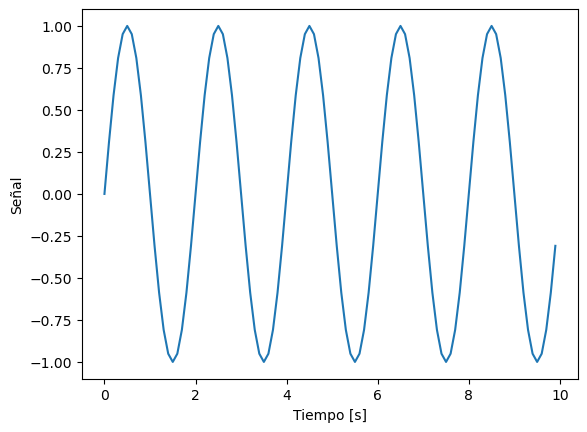

In [63]:
plt.plot(t,x)

plt.xlabel('Tiempo [s]')
plt.ylabel('Señal')

plt.show();

## 3.5 Conversión de comandos interactivos en un programa de Python

In [64]:
%hist

import numpy as np
np.array([[1,2],
          [3,4]])
A = np.array([[1, 2],
              [3, 4] ])

A
A[0]
x = np.arange(3)

x
A
x.T
# El resultado indica que un vector sigue siendo un vector,
# y que la transposición con '.T' no tiene efecto en su forma. 

x.T == x
A.T
A.T == A
# Filas

np.r_[1,2,3]
# Columnas

np.c_[
    [1.5,2,3]
]
x = np.arange(5)

x
x.T
x_2d = np.atleast_2d(x)

x_2d
x_2d.T
x = np.arange(3)

x
y = np.arange(3,6)

y
np.column_stack((x,y))
import numpy as np
import pandas as pd
df = pd.DataFrame({
    'Nombre':['Peter','Paul','Mary'],
    'Apellido':['Doe','Miller','Johnson'],
    'Peso':[68.3, 77.1, 56.7],
    'Genero':['m','m','f'],
    'Ranking':[2, 3, 1],
    'Dob':['1958-05-03','1958-12-01','1959-03-20']
})

df
df.dtypes
df.dob = pd.to_datetime(df.dob)
df.Dob = pd.to_datetime(df.dob)
df.Dob = pd.to_datetime(df.Dob)
df
df.dtypes
df
df.plot('Dob', 'Peso', marker = '*', lw=0 , ms = 15);
t = np.arange(0, 10, 0.1)

t
x = np.sin(t)

x
y = np.cos(t)

y
df = pd.DataFra

# 4. Paquetes de estadísticas para Python

## 4.1 Seaborn—Visualización de datos

In [65]:
x = np.linspace(1, 7, 50)

x

array([1.        , 1.12244898, 1.24489796, 1.36734694, 1.48979592,
       1.6122449 , 1.73469388, 1.85714286, 1.97959184, 2.10204082,
       2.2244898 , 2.34693878, 2.46938776, 2.59183673, 2.71428571,
       2.83673469, 2.95918367, 3.08163265, 3.20408163, 3.32653061,
       3.44897959, 3.57142857, 3.69387755, 3.81632653, 3.93877551,
       4.06122449, 4.18367347, 4.30612245, 4.42857143, 4.55102041,
       4.67346939, 4.79591837, 4.91836735, 5.04081633, 5.16326531,
       5.28571429, 5.40816327, 5.53061224, 5.65306122, 5.7755102 ,
       5.89795918, 6.02040816, 6.14285714, 6.26530612, 6.3877551 ,
       6.51020408, 6.63265306, 6.75510204, 6.87755102, 7.        ])

In [66]:
y = 3 + 2 * x + 1.5 * np.random.randn(len(x))

y

array([ 4.70791779,  6.3654291 ,  5.7323749 ,  5.79940438,  7.02986798,
        5.04401351,  7.93994922,  8.66698267,  8.69674458,  6.24649177,
        8.43389252,  6.69933681,  8.3680565 ,  7.18388321,  7.37728669,
       10.70022779,  7.96695159, 10.57277933,  9.58012103,  9.64517244,
        7.02824971,  9.94113652, 10.80835178, 10.72255642, 10.39839523,
       12.72111706, 11.68518015, 12.79251833, 12.42036377, 16.17237832,
       10.90583705,  9.97131033, 14.0340748 , 12.52287035, 12.60832927,
       13.3440307 , 13.77843726, 15.3008036 , 13.63474902, 14.78279017,
       13.1889367 , 15.05434058, 14.44663789, 14.48763581, 16.25326244,
       15.2637724 , 17.83996572, 16.52293468, 16.92301566, 16.07267899])

In [68]:
df = pd.DataFrame({'xData': x, 'yData': y})

df.head()

,xData,yData
0,1.000000,4.707918
1,1.122449,6.365429
2,1.244898,5.732375
3,1.367347,5.799404
4,1.489796,7.029868


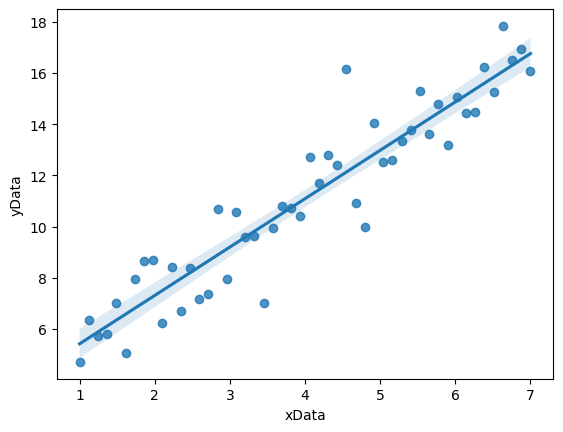

In [70]:
sns.regplot(x = 'xData', y = 'yData', data = df)

plt.show()

## 4.2 Pingouin

In [72]:
np.random.seed(123)

In [73]:
x = np.arange(100)

x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [74]:
y = 1.5 * x + 50 + 10 * np.random.randn(len(x))

y

array([ 39.14369397,  61.47345447,  55.82978498,  39.43705286,
        50.21399748,  74.01436537,  34.73320757,  56.21087371,
        74.65936259,  54.83259598,  58.21113848,  65.55291031,
        82.91389626,  63.11098003,  66.5601804 ,  68.15648724,
        96.05930083,  97.36786089,  87.04053898,  82.36186399,
        87.37368576,  96.40732028,  73.64166132,  96.25829045,
        73.46119332,  81.12248498,  98.07105196,  76.213193  ,
        90.5993128 ,  84.88245104,  92.44380629,  68.51410895,
        80.28466895,  92.50122765, 110.27462432, 100.76364317,
       104.02845916, 112.38222711,  98.20463657, 111.33627324,
       101.94633482,  94.22330506, 109.09100206, 120.23805862,
       119.38589051, 117.38169506, 142.92365266, 124.6291216 ,
       131.78736006, 145.88143338, 112.05914677, 116.1121179 ,
       145.43712225, 121.51937265, 131.2968323 , 143.19315969,
       142.90706391, 153.04886182, 151.95644137, 149.1939267 ,
       132.27291286, 149.44862668, 146.14271995, 131.23

In [76]:
stats.linregress(x,y) # Ajuste de recta con scipy

LinregressResult(slope=1.5028351171729766, intercept=50.130752434841256, rvalue=0.9678058655187531, pvalue=1.6044598942663455e-60, stderr=0.03948112773960396, intercept_stderr=2.262340965938778)

In [77]:
lm = pg.linear_regression(x,y) # Ajuste de recta con pingouin

lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,50.13,2.26,22.16,0.0,0.94,0.94,45.64,54.62
1,x1,1.50,0.04,38.06,0.0,0.94,0.94,1.42,1.58


## 4.3 Statsmodels—Herramientas para Modelado Estadístico

In [78]:
x = np.arange(100)

y = 0.5 * x - 20 + np.random.randn(len(x))

In [80]:
df = pd.DataFrame({'x': x, 'y': y})

df.head()

,x,y
0,0,-19.357945
1,1,-21.477888
2,2,-18.287735
3,3,-15.901696
4,4,-18.024626


In [82]:
# Ajuste un modelo lineal, usando el lenguaje de "fórmula" agregado por el paquete "patsy"

model = smf.ols('y ~ x', data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.164e+04
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          8.94e-117
Time:                        13:47:00   Log-Likelihood:                -138.22
No. Observations:                 100   AIC:                             280.4
Df Residuals:                      98   BIC:                             285.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.8325      0.193   -102.607      0.0

# 5. Consejos de programación

## 5.1 Consejos generales de programación

## 5.2 Consejos de Python

In [83]:
matriz = [[1, 2],
          [3, 4]]

matriz

[[1, 2], [3, 4]]

In [85]:
np.max(matriz)

4

In [86]:
np.max(matriz, axis = 0)

array([3, 4])

In [87]:
np.max(matriz, axis = 1)

array([2, 4])

## 5.3 Consejos de IPython/Jupyter

# 6. Ejercicios

$\textbf{Ejercicio 1:}$ Traducir puntos.

Escriba un script de Python que:
- Especifique 2 puntos
    - $P_0$ = (0/0)
    - $P_1$ = (2/1). 
    - Cada punto debe expresarse como una lista de Python ([a,b]).

- Combina estos 2 puntos en un np.array.

- Cambia esos datos, agregando 3 a la primera coordenada y 1 a la segunda. 

- Traza una línea desde el $P_0$ original al $P_1$ original, y en el mismo gráfico también trace una línea entre los valores desplazados.

In [88]:
# Definir los puntos originales

p_0 = [0,0]

p_1 = [2,1]

In [89]:
# Combinarlos en una matriz
array = np.array([p_0,
                  p_1])

array

array([[0, 0],
       [2, 1]])

In [90]:
# Trasladar el array

array2 = array + [3,1]

array2

array([[3, 1],
       [5, 2]])

In [91]:
array[:,0]

array([0, 2])

In [92]:
array[:,1]

array([0, 1])

In [93]:
array2[:,0]

array([3, 5])

In [94]:
array2[:,1]

array([1, 2])

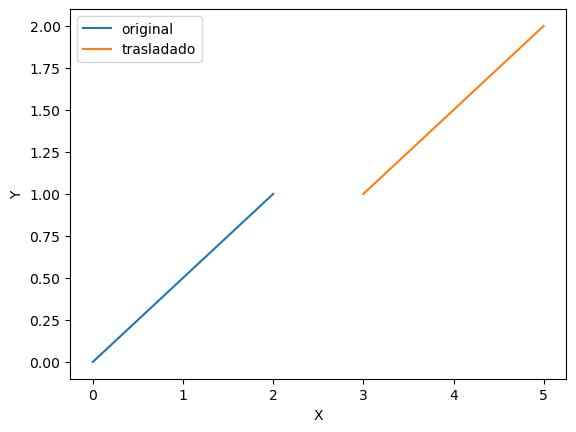

In [95]:
# Graficar los datos

plt.plot(array[:,0], array[:,1], label = 'original')

plt.plot(array2[:,0], array2[:,1], label = 'trasladado')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

$\textbf{Ejercicio 2:}$ Rotación de un vector.

Escriba un script de Python que especifique dos puntos, $P_0$ = (0/0) y $P_1$ = (2/1). 

Luego escriba una función de Python que
- Tome un vector y un ángulo como parámetros de entrada.
- Gire el vector 25 grados multiplicándolo con la matriz de rotación R. 
- Devuelva el vector rotado. 
- Sugerencia: 
    - Una matriz de rotación 2D se define mediante 
        - R = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]]) 
    - Si desea experimentar un poco con gráficos, puede intentar: 
        - Trazar una línea verde de $P_0$ a $P_1$.
        - Superponer este gráfico con un sistema de coordenadas, de −2 a +2.
        - Superponer la línea rotada en rojo, con mayor grosor de línea. (Puede modificar el ancho de una línea con el parámetro de trazado “linewidth=”).

In [99]:
def rotate_me(in_vector:np.ndarray, alpha:float) -> np.ndarray:
    
    """Función que rota un vector en 2 dimensiones
    Parámetros
    ----------
    in_vector : vector (2,) o array (:,2)
    vector(s) a rotar
    alpha : ángulo de rotación [grados]
    Retorna
    -------
    rotated_vector : vector (2,) o array (:,2)
    rotated vector
    Ejemplos
    --------
    perpendicular = rotate_me([1,2], 90)
    
    """

    alpha_rad = np.deg2rad(alpha)
    
    R = np.array([[np.cos(alpha_rad), -np.sin(alpha_rad)],
                  [np.sin(alpha_rad), np.cos(alpha_rad)]])

    return R @ in_vector

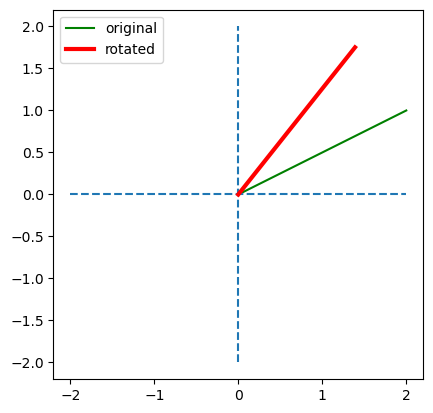

In [100]:
if __name__ == '__main__':
    
    vector = [2,1]
    
    # Dibuja una línea verde de [0,0] a [2,1]
    
    plt.plot([0,vector[0]], [0, vector[1]], 'g', label = 'original')

    # Sistema coordinado
    
    plt.hlines(0, -2, 2, linestyles='dashed')
    
    plt.vlines(0, -2, 2, linestyles='dashed')

    # Asegúrese de que las dimensiones x/y estén igualmente dibujadas
    
    cur_axis = plt.gca()
    
    cur_axis.set_aspect('equal')

    # Rotar el vector
    
    rotated = rotate_me(vector, 25)
    
    plt.plot([0, rotated[0]], [0 ,rotated[1]],label='rotated',color='r',linewidth=3)

    # Poner una leyenda
    
    plt.legend()

    # Grafico
    
    plt.show()

$\textbf{Ejercicio 3:}$ Series de Taylor. 
- Escribe una función que calcule la aproximación a un seno y un coseno, a segundo orden.
- Escriba un guión que grafique los valores exactos y los superponga con valores aproximados, en un rango de -50 grados a +50 grados. (Comando plt.xlim)
- Consejo:
    - Las aproximaciones de segundo orden al seno y al coseno están dadas por:
        - $sin(\alpha) \approx \alpha$
        - $cos(\alpha) \approx 1 - \frac{\alpha^2}{2}$

In [101]:
def approximate(angle:np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    
    """
    Función que calcula una aproximación de segundo orden a seno y coseno
    Parámetros
    ----------
    angle : ángulo [deg]
    Returns
    -------
    approx_sine : seno aproximado
    approx_cosine : coseno aproximado
    Ejemplos
    --------
    alpha = 0.1
    sin_ax, cos_ax = approximate(alpha)
    Notas
    -----
    La entrada también puede ser un solo flotador
    """
    
    sin_approx = angle
    
    cos_approx = 1 - angle**2/2
    
    return (sin_approx, cos_approx)

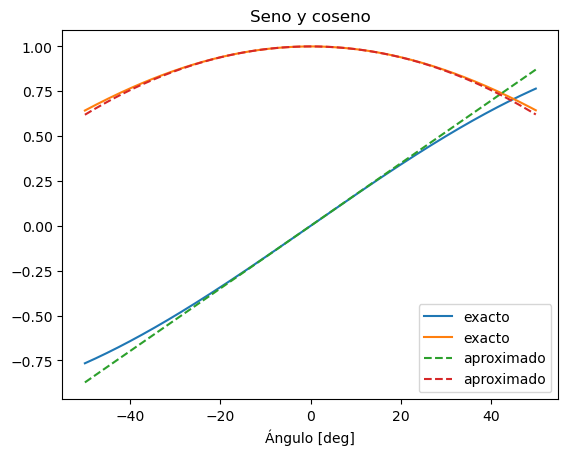

In [102]:
if __name__ == '__main__':
    
    limit = 50 # [deg]
    
    step_size = 0.1 # [deg]
    
    # Calculo los datos
    
    theta_deg = np.arange(-limit, limit, step_size)
    
    theta = np.deg2rad(theta_deg)
    
    sin_approx, cos_approx = approximate(theta)
    
    # Grafico
    
    plt.plot(theta_deg, np.column_stack((np.sin(theta), np.cos(theta))), label='exacto')
    
    plt.plot(theta_deg,np.column_stack((sin_approx, cos_approx)),linestyle='dashed',label='aproximado')
    
    # Agrego leyenda, nombre al eje x y título
    
    plt.legend()
    
    plt.xlabel('Ángulo [deg]')
    
    plt.title('Seno y coseno')
    
    # Muestro el gráfico 
    
    plt.show()

$\textbf{Ejercicio 4:}$ Primeros pasos con pandas
- Genere un DataFrame de pandas, con las marcas de tiempo de la columna x de 0 a 10 segundos, a una velocidad de 10 Hz, los valores de datos de la columna y con un seno con 1,5 Hz y la columna z con los valores de coseno correspondientes. Etiquete el tiempo de la columna x, los yvals de la columna y y los zvals de la columna z.
- Mostrar el encabezado de este DataFrame.
- Extraiga los datos de las filas 10 a 15 de yvals y zvals y escríbalos en el archivo out.txt.
- Informar al usuario dónde se han escrito los datos.
- Consejo: una introducción buena y concisa a los pandas es https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [103]:
# Establecer los parámetros

rate = 10

dt = 1/rate

freq = 1.5

In [105]:
# Cantidades derivadas

omega = 2 * np.pi * freq
omega

9.42477796076938

In [106]:
# Generar los datos

t = np.arange(0, 10, dt)

y = np.sin(omega * t)

z = np.cos(omega * t)

In [108]:
df = pd.DataFrame({'Tiempo': t, 'Y': y, 'Z': z})

df.head()

,Tiempo,Y,Z
0,0.0,0.000000,1.000000
1,0.1,0.809017,0.587785
2,0.2,0.951057,-0.309017
3,0.3,0.309017,-0.951057
4,0.4,-0.587785,-0.809017
